In [1]:
from diffcam.util import LOGPATH, load_pickle, RECONSTRUCTIONPATH, DATAPATH
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg
import os
import cv2

In [2]:
def load_data(name, contains = 'p'):
    files = []
    files.extend(glob.glob(os.path.join(LOGPATH,name),recursive=True))

    pickles = []
    for f in files:
        if contains in f:
            pickles.append(load_pickle(f))
        
    return pickles

algo_pickle = load_data("ridge*.pkl")
all_pickle = load_data("*.pkl")
pickle1000 = load_data("*.pkl", '1000')

In [9]:
p = load_data("pls*.pkl", '222')

In [4]:
# Grab first level information

def get_data_from_dict(pickle):
    lambda_ = []
    algo = []
    delta = []
    mse = []
    psnr = []
    ssim = []
    lpips = []
    mse_mean = []
    psnr_mean = []
    ssim_mean = []
    lpips_mean = []
    n_iter = []
    images = ['img1_rgb'] #, 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']
    lenseless = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])
        mse.append(save['mse'])
        psnr.append(save['psnr'])
        ssim.append(save['ssim'])
        lpips.append(save['lpips'])
        mse_mean.append(sum(save['mse'])/len(save['mse']))
        psnr_mean.append(sum(save['psnr'])/len(save['psnr']))
        ssim_mean.append(sum(save['ssim'])/len(save['ssim']))
        lpips_mean.append(sum(save['lpips'])/len(save['lpips']))
        n_iter.append(save['n_iter'])

        fp = []
        for im in images:
            fp.append(save[im]['recon_fp'])
        lenseless.append(fp)
    return lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless

In [ ]:
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(algo_pickle)

In [8]:
def get_photo(path, color = False):
    end = os.path.split(path)[-1]
    path = os.path.join(RECONSTRUCTIONPATH, end)
    data = mpimg.imread(path)
    if color:
        data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    return data

In [ ]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
fig, ax = plt.subplots(run+1, 7, figsize=(18,15))
ax[0,0].imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv2.cvtColor(cv2.imread(gt[2]), cv2.COLOR_BGR2RGB))
ax[0,2].imshow(cv2.cvtColor(cv2.imread(gt[3]), cv2.COLOR_BGR2RGB))
ax[0,3].imshow(cv2.cvtColor(cv2.imread(gt[4]), cv2.COLOR_BGR2RGB))
ax[0,4].imshow(cv2.cvtColor(cv2.imread(gt[5]), cv2.COLOR_BGR2RGB))
ax[0,5].imshow(cv2.cvtColor(cv2.imread(gt[6]), cv2.COLOR_BGR2RGB))
ax[0,6].imshow(cv2.cvtColor(cv2.imread(gt[7]), cv2.COLOR_BGR2RGB))
for i in range(0,run):
    for j in range(len(lenseless[i])):
        ax[i+1,j].imshow(get_photo(lenseless[i][j]))
        ax[i+1, 0].set_ylabel(f"{algo[i]}_{lambda_[i]}")

for i in range(0,run+1):
    for j in range(len(lenseless[i])):      
        ax[i, j].xaxis.set_visible(False)
        plt.setp(ax[i, j].spines.values(), visible=False)
        ax[i, j].tick_params(left=False, labelleft=False)
        ax[i, j].patch.set_visible(False)
        plt.tight_layout()
plt.show()

In [15]:
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(pickle1000)

In [10]:
lenseless = list(np.array(lenseless)[[2,6,8,0,7,3,4,5,1]])
algo = list(np.array(algo)[[2,6,8,0,7,3,4,5,1]])
lambda_ = list(np.array(lambda_)[[2,6,8,0,7,3,4,5,1]])

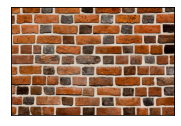

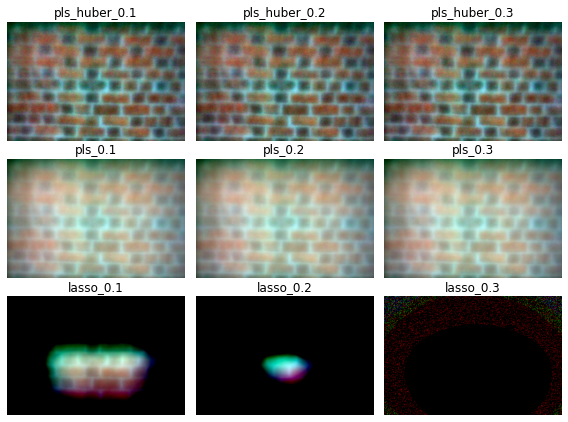

In [11]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
plt.figure(figsize = (3,2))
fig = plt.imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

fig, ax = plt.subplots(3, 3, figsize=(8,6))
for i in range(len(lenseless)):
    ax[i//3, i%3].imshow(get_photo(lenseless[i][0], color=True))
    ax[i//3, i%3].set_title(f"{algo[i]}_{lambda_[i]}")   
    ax[i//3, i%3].xaxis.set_visible(False)
    plt.setp(ax[i//3, i%3].spines.values(), visible=False)
    ax[i//3, i%3].tick_params(left=False, labelleft=False)
    ax[i//3, i%3].patch.set_visible(False)
    plt.tight_layout()
plt.show()

In [12]:
heatmap(mse_mean, algo, lambda_, delta, "mse")

NameError: name 'heatmap' is not defined

In [18]:
a = {"mse":mse_mean, "algo": algo, "lambda_":lambda_, "delta":delta, "n_iter":n_iter}
df = pd.DataFrame(a)

In [19]:
df

,mse,algo,lambda_,delta,n_iter
0,0.114521,pls,0.1,1,1000
1,0.271446,lasso,0.3,1,1000
2,0.083062,pls_huber,0.1,1,1000
3,0.114521,pls,0.3,1,1000
4,0.219617,lasso,0.1,1,1000
5,0.249244,lasso,0.2,1,1000
6,0.082978,pls_huber,0.2,1,1000
7,0.114521,pls,0.2,1,1000
8,0.082898,pls_huber,0.3,1,1000


In [ ]:
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(all_pickle)

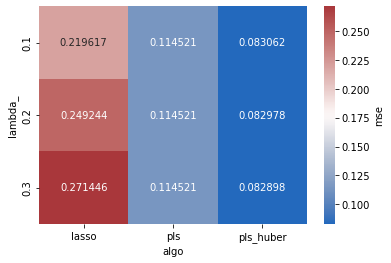

ValueError: zero-size array to reduction operation fmin which has no identity

In [16]:
def heatmap(metric, algo, lambda_, delta, metric_name):
    a = {metric_name:metric, "algo": algo, "lambda_":lambda_, "delta":delta, "n_iter":n_iter}
    df = pd.DataFrame(a)

    df_huber = df[(df['algo']=='pls_huber') & (df['n_iter'] == 100)]
    #df = df[df['algo']!='pls_huber']

    df = df.pivot(index='lambda_', columns="algo", values=metric_name)

    sns.heatmap(df, annot=True, fmt="f", cbar_kws={'label': metric_name}, cmap="vlag")
    plt.show()
    df_huber = df_huber.pivot("lambda_","delta",metric_name)
    sns.heatmap(df_huber, annot=True, fmt="f", cbar_kws={'label': metric_name}, cmap="vlag")
    plt.show()
    
heatmap(mse_mean, algo, lambda_, delta, "mse")

In [ ]:
algo_lambda = [i +"_"+ str(j) for i, j in zip(algo, lambda_)]
image_order = [['img8_rgb', 'img1_rgb', 'img3_rgb', 'img6_rgb', 'img7_rgb','img5_rgb','img4_rgb']]*len(mse)

In [ ]:
a = {'mse':mse, "algo_lambda":algo_lambda, "n_iter":n_iter, "image_order": image_order}
df = pd.DataFrame(a)

df = df[~(df['algo_lambda'].str.contains('pls_huber'))]
df = df.explode(['mse', 'image_order'])

df = df.pivot('algo_lambda', "image_order", "mse").reset_index(drop=False)

In [ ]:
g = sns.PairGrid(df,
                 x_vars=df.columns[1:], y_vars=['algo_lambda'],
                 height=10, aspect=.25)
g.map(sns.stripplot, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(.05, .6), xlabel="MSE", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['img8_rgb', 'img1_rgb', 'img3_rgb', 'img6_rgb', 'img7_rgb','img5_rgb','img4_rgb']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [ ]:
df.iloc[:,1:].values